filtro laplaciano

vencindario= segmento de una imagen generalmente del tamaño del kernel 3*3 

el filtro = Es un kernel que se convolucina con la imagen mediante = el kernel se multiplica con el vecindario y todos los valores de la nueva matriz se suma y es valor se pone en  el pixel que se esta trabajando.

padding = es el margen interno

In [10]:
import numpy as np

In [11]:
fl=np.array([[0,-1,0],[-1,4,-2],[0,-1,0]])
fl

array([[ 0, -1,  0],
       [-1,  4, -2],
       [ 0, -1,  0]])

Prewiit filter

used for edge detections: vertical and horizontal edges.

In [13]:
vpf=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
vpf

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [16]:
hpf=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
hpf

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

Sobel filter

In [17]:
hsf=np.array([[-1,0,1],[-3,0,-3],[-1,0,1]])

In [ ]:
vsf=np.array([[-1,0,1],[-3,0,-3],[-1,0,1]])
hsf=np.array([[1,0,-1],[3,0,-3],[1,0,-1]])

Robinson Compass Mask
Detects edges in a determined direction, eg, north,south,north northwest

In [ ]:
vrf=np.array([[-1,0,1],[-3,0,3],[-1,0,1]])
hrf=np.array([[1,0,-1],[3,0,-3],[1,0,-1]])

/home/hackbrian/anaconda3/envs/vision/lib/python3.10/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.robots.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


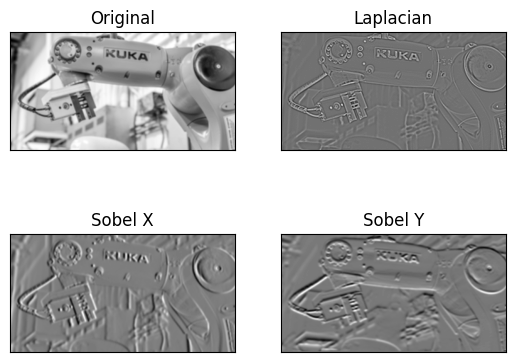

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, requests

# Download an image
img0 = requests.get("https://www.robots.com/images/general/_1200x630_crop_center-center_82_none/KUKA_Robot_Small_EOAT.png" , verify=False).content
with open('image.jpg', 'wb') as file:
    file.write(img0)

img0 = cv2.imread('image.jpg')

scale_percent = 30 # percent of original size
width = int(img0.shape[1] * scale_percent / 100)
height = int(img0.shape[0] * scale_percent / 100)
dim = (width, height)

img0 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
img0_color = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img0_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(img0_gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F, 1, 0,ksize=5)  # derivative x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # derivative y

images = [img, laplacian, sobelx, sobely]
titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']

for num, (image, title) in enumerate(zip(images, titles)):
  plt.subplot(2,2,num+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])

/home/hackbrian/anaconda3/envs/vision/lib/python3.10/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.robots.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


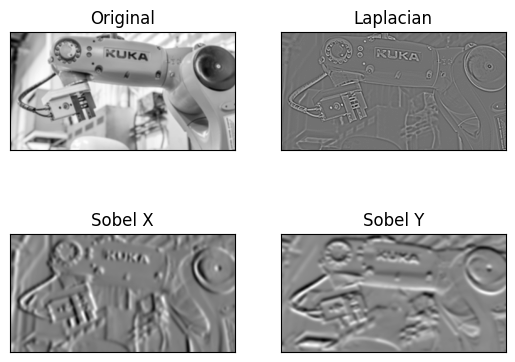

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, requests

# Download an image
img0 = requests.get("https://www.robots.com/images/general/_1200x630_crop_center-center_82_none/KUKA_Robot_Small_EOAT.png" , verify=False).content
with open('image.jpg', 'wb') as file:
    file.write(img0)

img0 = cv2.imread('image.jpg')

scale_percent = 30 # percent of original size
width = int(img0.shape[1] * scale_percent / 100)
height = int(img0.shape[0] * scale_percent / 100)
dim = (width, height)

img0 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
img0_color = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img0_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(img0_gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F, 1, 0,ksize=19)  # derivative x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=19)  # derivative y

images = [img, laplacian, sobelx, sobely]
titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']

for num, (image, title) in enumerate(zip(images, titles)):
  plt.subplot(2,2,num+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])